# POLSCI 3

# Week 6, Lecture Notebook 2: $p$-values

In this lecture, we're going to learn about *p*-values.

You might have heard about *p*-values before.

They're a notoriously difficult concept:

<img src="pvalue.png" height="auto" width="43%">

But they're **ubiquitious**. You'll have a hard time finding *any* article or study that doesn't tell you what the *p*-value is. You'll also often hear a related concept, "statistical significance", which depends on what the *p*-value is.

Today, we'll demystify them!

## Imagine a skeptic, let's call her Sarah

Today, we'll take a brief pause on analyzing real data to help you understand the idea of $p$-values.

Often in research, we are trying to argue something is true -- and we want to persuade someone who doesn't believe us. That is, a *skeptic*.

The skeptic's belief is is that we're wrong. We call the skeptic's belief *the null hypothesis*. And, to make things easier, for the purposes of this week we'll call the skeptic Sarah.

We'll start with a real-world situation involving a skeptical Sarah where a $p$-value would be helpful.

Suppose you and Sarah are roommates, and whenever you two are about to go out to eat, Sarah flips her favorite quarter to decide who gets to pick the restaurant. The last three times, the quarter has kept being heads, which means Sarah gets to pick. You've started to get suspicious -- maybe this coin isn't fair, and is actually more likely to flip heads than tails! Sarah is skeptical: of course the coin flips heads and tails equally often!

We call Sarah's belief **the null hypothesis**. The **null hypothesis** is whatever hypothesis we want to prove *wrong*, and we imagine is believed by skeptics (or a skeptic) who we want to prove wrong. If the skeptic accepts the null hypothesis is wrong, they then have to accept our **alternative hypothesis**.

Almost all empirical research makes an argument that a null hypothesis is wrong.

Let's see how this works with you and Sarah. Let's first state the null hypothesis really clearly:

- **Null hypothesis**: The coin is equally likely to flip heads and tails. (What Sarah the skeptic thinks and you want to show is wrong.)
- **Alternative hypothesis**: The coin is **not** equally likely to flip heads and tails. (What you want to show is true.)

How would you go about proving Sarah wrong?

One way is to flip the coin a bunch of times and see what happens. Let's use R to simulate this.

#### How things would look if Sarah's coin is fair

In [2]:
# This ensures that the same random numbers print out every time we run the code.
set.seed(92344)

# This function will simulate a certain number of coin flips with a certain probability of being heads.
# You don't need to learn this code.
flip.some.coins <- function(n.flips, prob.heads) rbinom(n.flips, 1, prob.heads)

# This runs my function, simulating flipping a truly fair coin (prob.heads is 0.5) 10 times.
flipped.coins <- flip.some.coins(10, 0.5)

# Let's look at the result.
flipped.coins

[1] 1 1 1 1 1 1 0 0 0 1

Aha, you say! Look, it flipped heads more often than tails! This means the coin must be unfair!

In [3]:
sum(flipped.coins)

[1] 7

But how would Sarah respond...?

Sarah the skpetic would say: **even if I were right (so the null hypothesis is true) and you were wrong, how often would we see this result by chance**? After all, isn't it plausible that this might happen by chance? We don't expect a fair coin to land heads **exactly** 5 out of 10 times it is flipped.

Sarah can make this argument rigirously. In particular, to prove this might have been a fluke, Sarah could open R and run code just like we wrote, checking to see **how likely it is that we could have seen the result we actually did (7 heads in 10 flips) even if the null hypothesis (what she thinks) were true**.

Sarah could do this by using R to figure out how often a fair coin might flip at least 7/10 times heads by chance:

In [4]:
sum(flip.some.coins(10, .5))

[1] 5

In [5]:
sum(flip.some.coins(10, .5))

[1] 6

In [9]:
sum(flip.some.coins(10, .5))

[1] 6

Instead of doing this one by one, let's use R to simulate 10,000 different tries of flipping a coin 10 times:

In [10]:
# You don't need to learn this code.
flip.results.num.heads <- replicate(10000, sum(flip.some.coins(10, .5)))
flip.results.num.heads

[1]  6  4  5  6  5  6  2  2  5  4  5  3  5  7  7  6  3  8  6  6  5  3  5  8
   [25]  6  3  5  5  7  8  5  4  4  5  6  3  5  8  5  6  5  8  5  5  5  4  8  6
   [49]  0  2  6  8  5  6  7  3  5  5  6  4  3  7  7  5  7  7  6  6  3  4  3  7
   [73]  6  5  3  4  7  6  3  4  9  5  4  6  6  7  4  7  5  4  6  4  7  5  6  7
   [97]  2  8  4  6  4  7  2  4  6  6  4  3  4  6  6  8  3  7  3  4  5  7  6  3
  [121]  5  1  4  3  6  3  6  7  5  8  7  6  5  4  5  6  3  4  4  4  4  5  6  5
  [145]  7  4  5  4  7  2  5  7  7  6  6  9  6  7  6  5  7  7  5  6  5  4  4  4
  [169]  5  6  8  5  6  6  4  7  3  4  4  4  2  3  3  3  5  6  3  5  4  3  4  6
  [193]  5  6  7  6  3  5  5  3  3  5  5  6  5  3  5  5  6  4  3  5  8  3  6  6
  [217]  5  6  5  4  7  4  1  4  4  3  6  6  5  2  4  6  4  3  3  5  4  4  4  4
  [241]  7  3  4  7  6  5  6  4  3  4  4  3  3  6  3  6  4  6  4  4  3  3  6  7
  [265]  4  4  6  6  7  5  6  4  6  5  5  3  3  6  4  3  4  6  5  5  5  4  5  8
  [289]  4  6  6  4  5  4  4  4  3  6  3  5  3  9  8  5  5  4  5  6  6  8  5  2
  [313]  3  5  4  6  5  7  5  5  6  4  5  5  5  3  5  4  3  4  5  4  4  6  6  6
  [337]  5  5  5  7  5  5  3  2  6  9  6  7  3  3  6  5  6  3  6  4  5  6  4  2
  [361]  6  7  4  7  7  2  7  6  4  7  7  3  7  8  4  6  9  7  4  7  6  5  2  5
  [385]  4  7  5  7  7  5  3  4  6  4  7  4  2  5  5  5  4  1  4  8  3  4  3  4
  [409]  4  4  5  4  7  5  6  7  2  6  4  5  7  9  3  2  3  3  4  5  6  8  5  6
  [433]  5  7  7  7  4  3  4  4  6  6  4  3  3  3  7  7  4  5  4  8  3  4  4  2
  [457]  6  6  3  7  4  7  6  7  4  5  7  4  6  3  4  4  2  8  5  5  6  3  7  2
  [481]  7  5  5  5  8  4  5  3  5  4  5  1  5  6  6  5  6  4  7  5  4  6  5  3
  [505]  4  4  5  5  4  4  7  3  4  4  7  4  6  6  5  4  4  7  5  5  7  5  8  4
  [529]  4  5  6  4  4  7  4  3  2  6  5  4  7  7  6  7  4  4  4  3  7  2  8  6
  [553]  7  4  5  4  5  5  5  9  4  4  6  2  4  6  4  5  4  6  6  4  6  4  3  4
  [577]  3  3  7  6  5  4  5  5  4  9  7  4  5  6  5  3  7  8  7  5  6  5  7  6
  [601]  2  7  4  4  6  4  4  4  3  6  3  3  4  6  5  1  7  6  5  3  6  3  3  4
  [625]  6  5  7  5  4  5  4  5  8  3  4  8  3  4  4  5  6  4  7  4 10  8  6  7
  [649]  8  5  4  7  5  2  3  6  4  9  4  2  4  6  5  5  4  4  2  5  6  4  8  4
  [673]  4  5  5  5  7  5  3  5  3  7  7 10  2  4  6  8  5  7  8  5  5  6  5  6
  [697]  6  5  4  5  4  6  5  4  5  3  4  6  3  4  5  7  4  4  5  5  5  4  4  5
  [721]  6  5  6  5  4  5  4  4  5  6  4  4  5  5  6  7  5  5  4  7  6  6  7  3
  [745]  8  5  7  4  4  6  6  4  5  3  5  4  7  6  4  6  4  5  6  1  4  4  5  7
  [769]  3  5  4  5  4  6  7  6  7  5  5  4  7  6  9  3  5  7  4  7  5  4  2  6
  [793]  5  3  6  3  6  4  3  6  3  5  6  4  6  5  4  4  3  5  4  7  4  6  4  3
  [817]  5  3  7  2  4  6  5  9  4  6  4  7  6  3  5  6  6  2  1  7  3  5  7  5
  [841]  6  6  3  4  5  3  4  5  5  7  3  5  3  7  6  3  5  5  6  4  5  2  2  5
  [865]  6  4  5  6  4  3  7  3  6  4  7  4  7  6  4  7  4  4  4  3  4  5  5  7
  [889]  6  4  5  1  4  7  1  8  5  7  3  8  1  6  4  3  5  4 10  4  4  4  5  2
  [913]  5  5  6  5  4  4  6  5  5  4  5  3  6  6  7  6  7  5  4  8  4  4  4  6
  [937]  5  5  5  5  4  5  5  7  5  4  3  2  4  4  6  7  5  8  3  4  7  3  6  8
  [961]  5  7  4  7  7  5  4  2  4  6  4  2  6  3  6  3  6  3  7  4  8  4  4  6
  [985]  5  8  6  5  6  3  6  8  3  7  4  4  9  4  5  2  5  4  6  2  5  5  7  5
 [1009]  5  5  7  5  3  6  4  5  5  6  2  6  1  4  4  6  5  3  4  5  4  5  5  6
 [1033]  5  7  4  5  3  7  5  5  5  7  6  6  4  4  5  5  5  5  4  6  5  6  4  6
 [1057]  5  3  7  6  9  3  4  2  7  4  6  6  3  6  7  2  5  5  8  6  5  4  7  4
 [1081]  5  3  4  5  6  5  3  5  7  4  8  3  4  5  6  4  4  6  5  3  5  7  6  3
 [1105]  5  6  5  5  6  6  5  7  7  6  2  7  2  5  5  2  3  9  2  7  5  5  4  5
 [1129]  4  4  8  4  3  8  4  4  3  7  6  3  3  7  3  7  4  5  3  6  5  4  2  3
 [1153]  2  6  8  6  5  6  2  5  4  8  7  6  2  5  5  7  5  5  4  7  4  3  6  4
 [1177]  3  2  5  5  4  4  6  7  7  8  3  5  9  5  6  5  7  7  7  7  5  5  4  7
 [12

Since there's 10,000 numbers, it's easier to look at the results graphically:

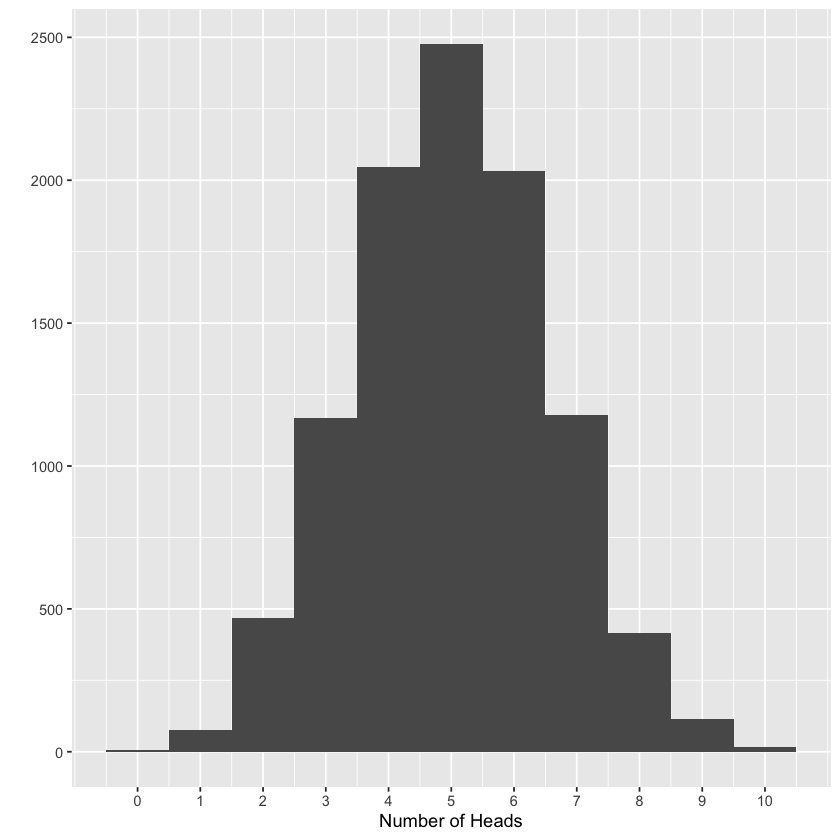

In [11]:
# You don't need to learn this code.
library(ggplot2)
qplot(flip.results.num.heads, bins = 11) + scale_x_continuous(breaks=seq(0,10,1)) + xlab("Number of Heads")

Just looking at this, it doesn't seem *that* rare that we'd see 7 or more heads.

But *exactly* how rare is it? Let's calculate this:

In [12]:
# This looks at each set of 10 simualted trials and asks whether 7 or more flips were heads.
flip.results.num.heads >= 7

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
   [25] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
   [49] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
   [73] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
   [85] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
   [97] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE
  [157] FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [265] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE
  [373]  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
  [385] FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [421]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
  [433] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
  [481]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
  [541]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
  [553]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
  [589] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
  [6

In [13]:
# What proportion had 7 or more heads?
mean(flip.results.num.heads >= 7)

[1] 0.173

In other words, about 17% of the time that you flip a completely fair coin 10 times, you'd expect to see 7 or more heads. This suggests Sarah has a point: the evidence we have that her coin is unfair (7 heads out of 10 flips) isn't actually all that strong; there's a decent chance we could have seen this (7 heads out of 10 flips) even if the null hypothesis (the coin is fair) was true.

Congratulations, you've seen your first $p$-value! **A $p$-value is the probability that we would see an answer as or more extreme than the answer we saw even if the null hypothesis was true.**

You can also see this visually by looking at a graph of the evidence we saw and where it falls relative to what could have happened by chance:

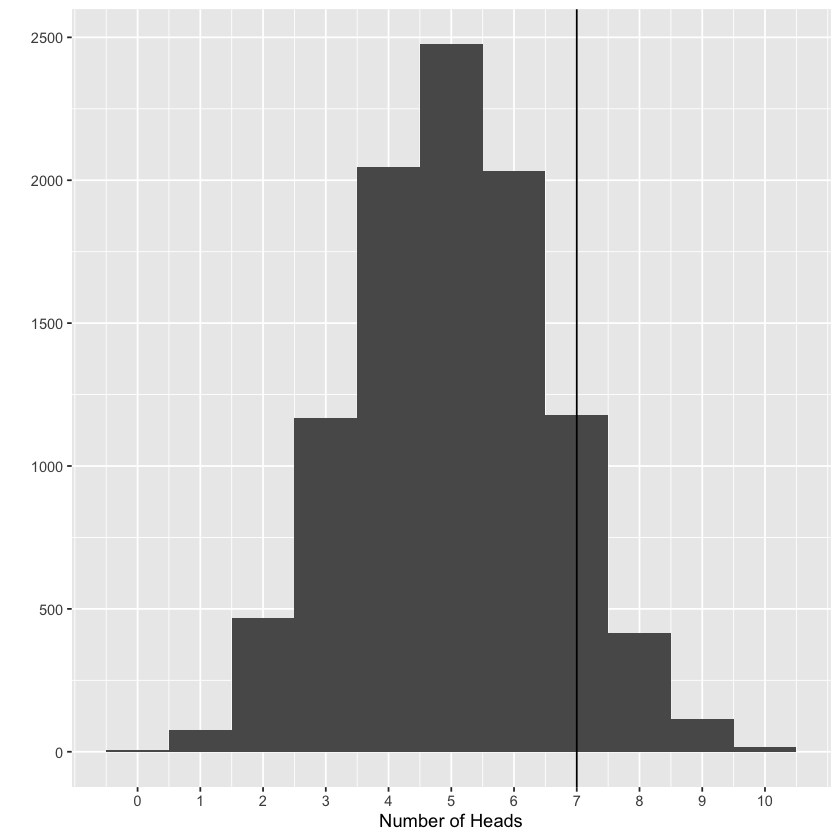

In [14]:
qplot(flip.results.num.heads, bins = 11) + scale_x_continuous(breaks=seq(0,10,1)) + xlab("Number of Heads") + ggplot2::geom_vline(xintercept = 7)

The graph helps us see that, to construct a $p$-value, we always need two ingredients: 1) *an estimate that we actually saw* and 2) *an understanding of what might have occurred by chance if the null hypothesis were true*.

With these two ingredients, we can calculate our $p$-value, what the probability is that we would have seen what we saw by chance.

## Statistical significance

So far, what we've learned about $p$-values might make them seem only like a way for skeptics like Sarah to show that evidence is ambiguous and the null hypothesis might be right.

But in science, we often want to argue the null hypothesis should be **rejected**---that is, that Sarah should accept she is wrong.

For example, say that you saw 9 flips out of 10 be heads:

In [15]:
mean(flip.results.num.heads >= 9)

[1] 0.0133

There's only about a 1% chance we would have seen this if Sarah were right. That seems unlikely. In fact, in this case, you might be tempted to tell Sarah: "**it's really unlikely we would have seen this (9/10 heads) by chance if the null hypothesis (that the coin is fair, what Sarah the skeptic believes) were right**. So, as a result **we should reject the null hypothesis**."

This is how scientists usually use $p$-values: to argue that the evidence they saw is really unlikely to have occurred by chance, suggesting we should **reject the null hypothesis**.

In general, **the lower the $p$-value, the less likely it is that we would have seen the evidence we saw by chance if the null hypothesis were true**. For example, in this case there's only a 1% chance we would have seen 9/10 heads by chance---which seems really unlikely!

But when does a $p$-value go from being insufficiently low to reject the null hypothesis (e.g., 0.17) to low enough that we can reject the null hypothesis (e.g., 0.01)?

**Social scientists have _arbitrarily_ decided to denote all estimates with *p*-values below 0.05 statistically significant**. That means we have arbitrarily decided that, if there is a 1 in 20 chance or less that a study would get the estimate it did if the null hypothesis were true, we decide to conclude for the sake of scientific discussions that the null hypothesis should be considered false. (In physics, they require _p_-values of 1 in 3.5 million.)

When researchers test their theories, a key moment is always examining their evidence, calculating how likely it is they would see the evidence by chance (the $p$-value), and rejoicing if the $p$-value is below 0.05, as this means they can reject the skeptic's null hypothesis that they are wrong.

#### Wait, why not just calculate the probability we are right?

Thinking back to the coin example, why are we calculating *the probability we would see what we saw if Sarah were right* and hoping it's unlikely we saw this? Isn't a more direct way to show we're right to just calculate the probability we are right?

It turns out this is impossible.

An xkcd comic gives a good example of why this is:

<img src="frequentists_vs_bayesians_2x.png" width="50%" height="auto">

Simply because there is only a 2.7% chance we would have seen something (a p-value of 0.027) doesn't mean the null hypothesis must be wrong. So, in this case, would we conclude there's only a 2.7% chance the sun hasn't exploded (so, a 97.3% chance that it has)? No. Things with a 2.7% chance happen all the time, and, since it seems really unlikely the sun exploded, we can reasonably conclude that probably happened here. This is a good example of why a $p$-value can't tell you the probability you are right.

More generally, in statistics, we **cannot calculate the probability we are right**.

All we can do is **calculate the probability we would have seen what we saw (e.g., 9/10 heads) if the skeptic (Sarah) were right, and hope this is unlikely**.

All we can get directly from data is a *p*-value: the probability of seeing what we saw **if the null hypothesis were wrong**. (Or, the probability of the machine telling us the sun exploded **even if it didn't**.)

You can see how this sets up an awkward situation for communicating results. One person can say "my *p*-value is 0.027!" (like in the sun exploding example). Then, someone else can reasonably say, "that still seems possible."

### Interpreting _p_-values correctly

People often think $p$-values mean something they don't.

To go over this again: **a _p_-value is the probability of seeing an estimate as large or larger than the estimate we saw _if the null hypothesis were true_**.

A _p_-value is **NOT** the probability the hypothesis you want to prove right (the alternative hypothesis) is true.

A _p_-value is **NOT** the probability the null hypothesis is true.

#### A statistically significant $p$-value doesn't mean the null hypothesis is _actually_ false

Another way of thinking about what a _p_-value tells us: if we repeated a study many times, what percent of the time would we get an estimate as extreme as we did if the null hypothesis were true.

For example, suppose 20 different groups in the class did a final project looking at whether eating jelly beans causes acne. Even if there is no effect of jelly bean eating on acne (i.e., the null hypothesis is true), we'd expect 1 out of the 20 groups to get a result with a *p*-value less than 0.05 merely by chance.

xkcd is helpful again here:

<img src="significant.png" width="40%" height="auto">

The important point here is that, even if the null hypothesis is true (the beans have no effect), we might see a p-value less than 0.05. In fact, we expect this to happen around 5% of the time we run a study.

#### A non-statistically significant $p$-value doesn't mean the null hypothesis is true

Just like a statistically significant result doesn't necessarily mean the null hypothesis is false, failing to find a statistically significant result doesn't mean the null hypothesis is true.

For example, a study might have a really small sample size. In this case, even a large effect would be impossible to see, and we would have a large (i.e., non-significant) $p$-value. This doesn't mean the null hypothesis is true. It just means we can't tell Sarah the skeptic she's wrong.

If you think the null hypothesis is wrong but get a non-significant p-value, you don't need to abondon your beliefs. But Sarah the skeptic is going to keep thinking the null hypothesis is true; you can't show her much, either. A study with a non-significant p-value is simply *inconclusive*.

I can see this being frustrating. And yes, it *is* frustrating to get results back from a study when your estimate *suggests* your treatment might have an effect (or otherwise suggested your alternative hypothesis is true) --- but when a skeptic can still say "but there's a decent chance that you could have seen this estimate by chance."

Often, data just isn't fully conclusive. That's life.

However, just because a study doesn't establish that the null hypothesis is true or false all reasonable doubt doesn't mean it tells us nothing.

When we get results from studies with insignificant $p$-values, a reasonable response to Sarah the skeptic is: "If you're skeptical of the alternative hypothesis, I can't prove you wrong. It's possible we would have seen what we saw if you were right and the null hypothesis were true. However, I might still be right, too."

Sometimes in life we have to make decisions, and **an insignificant $p$-value does not mean the null hypothesis is true**. An estimate is still a good best guess, even if its evidence isn't strong.

## Reviewing New Concepts/Terms

- **Null hypothesis**: The hypothesis you want to disprove. Often, in experiments, this is that the treatment you're interested in has no effect.
- **Alternative hypothesis**: The hypothesis you want to demonstrate. Often, in experiments, this is that the treatment you're interested in *does* have an effect.
- **_p_-value**: The probability we would see an estimate as large or larger as the one we did, *if* a skeptic were correct that the null hypothesis were true.
    - Does *not* measure the probability the null hypothesis is true.
    - Does *not* measure the probability the alternative hypothesis is false.
    - Helps answer a skeptic of a treatment by telling them how likely it is we would see the evidence we did if the null hypothesis were true. (Example we'll see next week: answer skeptic who thinks treatment has no effect.)
- **Statistical significance**: A _p_-value less than 0.05. This is an arbitrary threshold social scientists have agreed upon to decide that there is strong statistical evidence that a treatment has an effect.
    - A statistically significant p-value:
        - Means that, by convention, we say the null hypothesis can be rejected.
        - Does **not** mean the null hypothesis is guaranteed to definitely be wrong. It's possible--indeed, with a p-value of 0.05, there's a 5% chance--of getting a statistically significant result even if the null hypothesis is actually true.
    - A statistically insignificant p-value:
        - Means that, by convention, we cannot reject the null hypothesis.
        - Does **not** mean that the null hypothesis is true. For example, a study might be too imprecise to detect the fact the null hypothesis is wrong (we'll talk more about this more next week).

If you're still having trouble with $p$-values, I recommend <a href="https://medium.com/@timothyguang/can-you-explain-the-p-value-to-your-grandmother-heres-an-intuitive-explanation-f64e6c0ecffb" target="_blank">this blog post</a>.